# Capstone

The following variable was created as to not run cell 7. Cell 7 is where I scraped for both a genius API and a spotify API to get lyrics as well as certain spotify features. If you'd like to run cell 7 to see how it works, please feel free to change False to True.

In [1]:
scrape = False

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, recall_score
from xgboost import XGBRFClassifier,XGBClassifier
import shap
from imblearn.over_sampling import SMOTE
shap.initjs()
import warnings
from collections import Counter
from nltk import FreqDist
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
warnings.filterwarnings('ignore')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported fr

# Cleaning

## Random Songs

In [3]:
df_rando = pd.read_csv('Spotify-2000.csv', index_col=[0])

In [4]:
df_rando.head()

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
Index,,,,,,,,,,,,,,
1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


### Spotify and Genius API

In [5]:
import os

In [6]:
os.listdir("/Users/jamesbrochhausen/.secret")

['Spotify.json']

In [7]:
# pip install lyricsgenius
# pip install spotipy

In [8]:
if scrape:
    import json

    with open("/Users/jamesbrochhausen/.secret/Spotify.json") as file:
        login = json.loads(file.read())

    login.keys()

    import spotipy
    from spotipy.oauth2 import SpotifyClientCredentials

    sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=login['client_id'],
                                                               client_secret=login['client_secret']))

    df_rando['Lyrics']=''
    df_rando.head()

    import lyricsgenius
    genius = lyricsgenius.Genius(login['genius_secret'])

    def get_lyrics(x):
        title = x['Title']
        artist = x['Artist']

        song = genius.search_song(title, artist)
    #     print(song.lyrics)
        try: 
            return song.lyrics
        except:
            return 'Not Found'
    print('Scraping data')
    df_rando['Lyrics']=df_rando.apply(lambda x: get_lyrics(x), axis=1)

    df_rando.to_csv('randomsongs.csv',index=False)
else:
     print ('Skipping since scrape == False')   
# Change this to a relative file path

Skipping since scrape == False


In [9]:
df_rando = pd.read_csv('randomsongs.csv')

In [10]:
df_rando.head()

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Lyrics
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,"[Verse 1]\nSunrise, sunrise\nLooks like mornin..."
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,[Verse 1]\nBlack night is not right\nI don't f...
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,[Intro: 2D]\nHoo-hoo-hoo-hoo-hoo\n\n[Chorus: 2...
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,[Intro]\nKeep you in the dark\nYou know they a...
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59,"[Verse 1]\nIt's raining, but there ain't a clo..."


In [11]:
print(df_rando['Lyrics'].iloc[0])

[Verse 1]
Sunrise, sunrise
Looks like mornin' in your eyes
But the clock's held 9:15 for hours
Sunrise, sunrise
Couldn't tempt us if it tried
'Cause the afternoon's already come and gone

[Chorus 1]
And I said
Hoo-ooh-ooh-ooh
Hoo-ooh-ooh-ooh
Hoo-ooh-ooh-ooh
To you

[Verse 2]
Surprise, surprise
Couldn't find it in your eyes
But I'm sure it's written all over my face
Surprise, surprise
Never something I could hide
When I see we made it through another day

[Chorus 1]
And I said
Hoo-ooh-ooh-ooh
Hoo-ooh-ooh-ooh
Hoo-ooh-ooh-ooh
To you

[Bridge]
Now the night
Will throw its cover down
On me again
Ooh, and if I'm right
It's the only way
To bring me back

[Chorus 2]
Hoo-ooh-ooh-ooh
Hoo-ooh-ooh-ooh
Hoo-ooh-ooh-ooh
To you
Hoo-ooh-yeah
Hoo-ooh-ooh-ooh
Hoo-ooh-ooh-ooh
To you


Now that I've confirmed all the lyrics are in the songs, I need to go through the Lyrics column and removes words like Chorus and Bridge and Verse.

In [12]:
## Removing words from rows in Lyrics Column

word_list = ['[Chorus 1]','[Chorus 2]','[Chorus 3]','[Chorus 4]',
             '[Verse 1]','[Verse 2]','[Verse 3]','[Verse 4]','[Bridge]',
             '[Intro]','[Chorus]','[Outro]','[outro]','[Verse]','[verse]',
            '[Pre-Chorus]','[pre-chorus]','[Instrumental]','[instrumental]',
             '[post-chorus]','[Post-Chorus]']

In [13]:
# for word in word_list:
#     for lyric in df_rando['Lyrics']:
# #     if word in df_rando['Lyrics']:
#         if word in lyric:
# #             print(word)
#             df_rando['Lyrics'].replace((word,''),inplace=True)

In [14]:
def replace_words(word_list, lyrics):
#     print(lyrics)
    for word in word_list:
        if word in lyrics:
            lyrics = lyrics.replace(word,'')
#             print(word)
    return(lyrics)

df_rando['Lyrics']=df_rando['Lyrics'].apply(lambda x: replace_words(word_list,
                                                                    x))    
        

In [15]:
print(df_rando['Lyrics'][1])


Black night is not right
I don't feel so bright
I don't care to sit tight


Maybe I'll find on the way down the line
That I'm free, free to be me
Black night is a long way from home


I don't need a dark tree
I don't want a rough sea
I can't feel, I can't see


Maybe I'll find on the way down the line
That I'm free, free to be me
Black night is a long way from home


Black night, black night
I don't need black night
I can't see dark light


Maybe I'll find on the way down the line
That I'm free, free to be me
Black night is a long way from home


## Billboard

In [16]:
df_bb = pd.read_csv('billboardHot100_1999-2019.csv', index_col=[0])

Removing unnecassary columns for our solution

In [17]:
df_bb = df_bb.drop(columns=['Features','Writing.Credits','Week','Date'])
df_bb.head()

,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Genre,Lyrics
1,"Lil Nas,",Old Town Road,1,1.0,7.0,"Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm..."
2,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,Pop,Senorita \nI love it when you call me senorita...
3,Billie Eilish,Bad Guy,3,2.0,13.0,"Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...","bad guy \nWhite shirt now red, my bloody nose\..."
4,Khalid,Talk,4,3.0,20.0,"Synth-Pop,Pop",Talk \nCan we just talk? Can we just talk?\nTa...
5,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,"Canada,UK,Dance,Dance-Pop,Pop",I Don't Care \nI'm at a party I don't wanna be...


In [18]:
print(df_bb['Lyrics'].iloc[0])

Old Town Road Remix 
Oh, oh-oh
Oh
Yeah, I'm gonna take my horse to the old town road
I'm gonna ride til I can't no more
I'm gonna take my horse to the old town road
I'm gonna ride til I can't no more
Kio, Kio
I got the horses in the back
Horse tack is attached
Hat is matte black
Got the boots that's black to match
Riding on a horse, ha
You can whip your Porsche
I been in the valley
You ain't been up off that porch, now
Can't nobody tell me nothin'
You can't tell me nothin'
Can't nobody tell me nothin'
You can't tell me nothin'
Riding on a tractor
Lean all in my bladder
Cheated on my baby
You can go and ask her
My life is a movie
Bull riding and boobies
Cowboy hat from Gucci
Wrangler on my booty
Can't nobody tell me nothin'
You can't tell me nothin'
Can't nobody tell me nothin'
You can't tell me nothin'
Yeah, I'm gonna take my horse to the old town road
I'm gonna ride til I can't no more
I'm gonna take my horse to the old town road
I'm gonna ride til I can't no more
Hat down, cross town

In [19]:
df_bb.shape

(97225, 7)

In [20]:
## Checking for duplicates
df_bb['Name'].duplicated().any()

True

Since I'm going to eventually be joining this column with my Hot Stuff column below, I'm going to need to remove and and all duplicates before I can initiate that process down the line.

In [21]:
df_bb['Name'].duplicated().value_counts()

True     90767
False     6458
Name: Name, dtype: int64

The dataset above houses duplicate songs as they appear multiple times in a week and multiple times throughout a year. Which makes sense why there are so many. What we care about most however is the lyrics and how similar they are to one another. So we're going to drop all duplicate lyrics (just in case there are some songs with the same title).

In [22]:
df_bb['Lyrics'].duplicated().value_counts()

True     90020
False     7205
Name: Lyrics, dtype: int64

In [23]:
df_bb = df_bb.drop_duplicates(subset=['Lyrics'])

In [24]:
print(df_bb.shape)
df_bb.head(3)

(7205, 7)


,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Genre,Lyrics
1,"Lil Nas,",Old Town Road,1,1.0,7.0,"Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm..."
2,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,Pop,Senorita \nI love it when you call me senorita...
3,Billie Eilish,Bad Guy,3,2.0,13.0,"Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...","bad guy \nWhite shirt now red, my bloody nose\..."


### Verifying all the lyrics are in the actual song

In [25]:
print(df_bb['Lyrics'][1])

Old Town Road Remix 
Oh, oh-oh
Oh
Yeah, I'm gonna take my horse to the old town road
I'm gonna ride til I can't no more
I'm gonna take my horse to the old town road
I'm gonna ride til I can't no more
Kio, Kio
I got the horses in the back
Horse tack is attached
Hat is matte black
Got the boots that's black to match
Riding on a horse, ha
You can whip your Porsche
I been in the valley
You ain't been up off that porch, now
Can't nobody tell me nothin'
You can't tell me nothin'
Can't nobody tell me nothin'
You can't tell me nothin'
Riding on a tractor
Lean all in my bladder
Cheated on my baby
You can go and ask her
My life is a movie
Bull riding and boobies
Cowboy hat from Gucci
Wrangler on my booty
Can't nobody tell me nothin'
You can't tell me nothin'
Can't nobody tell me nothin'
You can't tell me nothin'
Yeah, I'm gonna take my horse to the old town road
I'm gonna ride til I can't no more
I'm gonna take my horse to the old town road
I'm gonna ride til I can't no more
Hat down, cross town

## Hot Features

May use this as well with an API call to create a data frame that includes more of the other information. But for now we're focused on achieving lyrical results.

In [26]:
df_hot_audio_features = pd.read_csv('Hot 100 Audio Features.csv')

In [27]:
df_hot_audio_features.head(3)

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_album,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,"AdictoTainy, Anuel AA & Ozuna","Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],3jbT1Y5MoPwEIpZndDDwVq,NaN,Adicto (with Anuel AA & Ozuna),False,270740.0,91.0,...,10.0,-4.803,0.0,0.0735,0.017,0.000016,0.179,0.623,80.002,4.0
1,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ShallowLady Gaga & Bradley Cooper,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",2VxeLyX666F8uXCJ0dZF8B,NaN,A Star Is Born Soundtrack,False,215733.0,88.0,...,7.0,-6.362,1.0,0.0308,0.371,0.000000,0.231,0.323,95.799,4.0


In [28]:
##Further removing features I don't want included

df_hot_audio_features = df_hot_audio_features.drop(columns=['spotify_track_id',
                                    'spotify_track_preview_url',
                     'spotify_track_album','spotify_track_explicit',
                     'spotify_track_duration_ms'])

Checking duplicates again to remove before joining our two data frames.

In [29]:
# df_hot_audio_features['SongID'].duplicated().value_counts()

In [30]:
df_hot_audio_features['Song'].duplicated().value_counts()

False    23551
True      4941
Name: Song, dtype: int64

In [31]:
df_hot_audio_features = df_hot_audio_features.drop_duplicates(subset=['Song'])

In [32]:
df_hot_audio_features['Song'].duplicated().value_counts()

False    23551
Name: Song, dtype: int64

In [33]:
df_hot_audio_features.head(3)

,SongID,Performer,Song,spotify_genre,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,"AdictoTainy, Anuel AA & Ozuna","Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],91.0,0.734,0.836,10.0,-4.803,0.0,0.0735,0.017,0.000016,0.179,0.623,80.002,4.0
1,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ShallowLady Gaga & Bradley Cooper,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",88.0,0.572,0.385,7.0,-6.362,1.0,0.0308,0.371,0.000000,0.231,0.323,95.799,4.0


In [34]:
print(df_hot_audio_features.shape)
df_bb.shape

(23551, 17)


(7205, 7)

## Hot Stuff

In [35]:
# df_hot_stuff = pd.read_csv('Hot Stuff.csv')

In [36]:
# df_hot_stuff.head()

In [37]:
df_hot_audio_features.head()

,SongID,Performer,Song,spotify_genre,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,"AdictoTainy, Anuel AA & Ozuna","Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],91.0,0.734,0.836,10.0,-4.803,0.0,0.0735,0.01700,0.000016,0.1790,0.623,80.002,4.0
1,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ShallowLady Gaga & Bradley Cooper,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",88.0,0.572,0.385,7.0,-6.362,1.0,0.0308,0.37100,0.000000,0.2310,0.323,95.799,4.0
3,EnemiesPost Malone Featuring DaBaby,Post Malone Featuring DaBaby,Enemies,"['dfw rap', 'melodic rap', 'rap']",86.0,0.542,0.674,6.0,-4.169,1.0,0.2100,0.05880,0.000000,0.0955,0.667,76.388,4.0
4,"Bacc At It AgainYella Beezy, Gucci Mane & Quavo","Yella Beezy, Gucci Mane & Quavo",Bacc At It Again,"['dfw rap', 'rap', 'southern hip hop', 'trap']",61.0,0.948,0.623,8.0,-5.725,0.0,0.1680,0.00124,0.000001,0.0716,0.856,135.979,4.0


In [38]:
df_bb.head()

,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Genre,Lyrics
1,"Lil Nas,",Old Town Road,1,1.0,7.0,"Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm..."
2,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,Pop,Senorita \nI love it when you call me senorita...
3,Billie Eilish,Bad Guy,3,2.0,13.0,"Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...","bad guy \nWhite shirt now red, my bloody nose\..."
4,Khalid,Talk,4,3.0,20.0,"Synth-Pop,Pop",Talk \nCan we just talk? Can we just talk?\nTa...
5,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,"Canada,UK,Dance,Dance-Pop,Pop",I Don't Care \nI'm at a party I don't wanna be...


In [39]:
# df_hot_stuff.info()

## Merge Data Frames on Song Title

In [40]:
## Show all columns
pd.set_option('display.max_columns', None)

In [41]:
# Join Columns on both Artists and Song name

print(df_bb.shape, df_hot_audio_features.shape)
master_df = pd.merge(df_hot_audio_features, df_bb,
                  left_on=['Performer','Song'], right_on=['Artists','Name'],
                     how='inner')



# print(df_bb.shape)
# print(df_hot_audio_features.shape)
# print()
print(master_df.shape)
master_df.head(3)

(7205, 7) (23551, 17)
(4119, 24)


,SongID,Performer,Song,spotify_genre,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Genre,Lyrics
0,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Justin Moore,The Ones That Didn't Make It Back Home,93,93.0,2.0,Country,The Ones That Didn't Make It Back Home \nTour ...
1,"Break Up With Your Girlfriend, I'm BoredAriana...",Ariana Grande,"Break Up With Your Girlfriend, I'm Bored","['dance pop', 'pop', 'post-teen pop']",85.0,0.726,0.554,5.0,-5.290,0.0,0.0917,0.0421,0.0,0.106,0.335,169.999,4.0,Ariana Grande,"Break Up With Your Girlfriend, I'm Bored",49,2.0,20.0,"Trap,Trip-Hop,Lo-Fi,R&;B,Pop","break up with your girlfriend, i'm bored \nYou..."
2,TrampolineSHAED,SHAED,Trampoline,"['electropop', 'pop']",91.0,0.619,0.459,7.0,-5.782,0.0,0.0334,0.5600,0.0,0.137,0.498,126.803,4.0,SHAED,Trampoline,77,77.0,4.0,Pop,Trampoline \nI've been having dreams\nJumping ...


## Deal with duplicates round 1

In [42]:
## One duplicate
master_df['Song'].duplicated().value_counts()

False    4118
True        1
Name: Song, dtype: int64

In [43]:
## Remove last duplicate
master_df = master_df.drop_duplicates(subset=['Song'])

In [44]:
master_df['Song'].duplicated().value_counts()

False    4118
Name: Song, dtype: int64

In [45]:
master_df.isna().sum()

SongID                        0
Performer                     0
Song                          0
spotify_genre                20
spotify_track_popularity    114
danceability                119
energy                      119
key                         119
loudness                    119
mode                        119
speechiness                 119
acousticness                119
instrumentalness            119
liveness                    119
valence                     119
tempo                       119
time_signature              119
Artists                       0
Name                          0
Weekly.rank                   0
Peak.position               656
Weeks.on.chart              656
Genre                         0
Lyrics                        0
dtype: int64

In [46]:
master_df.head(3)

,SongID,Performer,Song,spotify_genre,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Genre,Lyrics
0,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Justin Moore,The Ones That Didn't Make It Back Home,93,93.0,2.0,Country,The Ones That Didn't Make It Back Home \nTour ...
1,"Break Up With Your Girlfriend, I'm BoredAriana...",Ariana Grande,"Break Up With Your Girlfriend, I'm Bored","['dance pop', 'pop', 'post-teen pop']",85.0,0.726,0.554,5.0,-5.290,0.0,0.0917,0.0421,0.0,0.106,0.335,169.999,4.0,Ariana Grande,"Break Up With Your Girlfriend, I'm Bored",49,2.0,20.0,"Trap,Trip-Hop,Lo-Fi,R&;B,Pop","break up with your girlfriend, i'm bored \nYou..."
2,TrampolineSHAED,SHAED,Trampoline,"['electropop', 'pop']",91.0,0.619,0.459,7.0,-5.782,0.0,0.0334,0.5600,0.0,0.137,0.498,126.803,4.0,SHAED,Trampoline,77,77.0,4.0,Pop,Trampoline \nI've been having dreams\nJumping ...


## Now I need to merge my random songs data frame to our master data frame.

In [47]:
master_df.head(1)

,SongID,Performer,Song,spotify_genre,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Genre,Lyrics
0,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Justin Moore,The Ones That Didn't Make It Back Home,93,93.0,2.0,Country,The Ones That Didn't Make It Back Home \nTour ...


In [48]:
df_rando.head(1)

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Lyrics
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,"\nSunrise, sunrise\nLooks like mornin' in your..."


Dropping columns in df_rando that are not in master df and vice versa aside from the billboard rankings which we will fill out later.

In [49]:
# title, yes
# artist, yes
# year, no
# bpm, no
# energy, yes
# dance, yes
# loudness, yes
# liveness, yes
# valence, yes
# length, yes
# accousticness, yes
# speechiness, yes
# pupularity, yes



df_rando = df_rando.drop(['Beats Per Minute (BPM)','Year'], axis=1)
df_rando.head(3)

,Title,Artist,Top Genre,Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Lyrics
0,Sunrise,Norah Jones,adult standards,30,53,-14,11,68,201,94,3,71,"\nSunrise, sunrise\nLooks like mornin' in your..."
1,Black Night,Deep Purple,album rock,79,50,-11,17,81,207,17,7,39,\nBlack night is not right\nI don't feel so br...
2,Clint Eastwood,Gorillaz,alternative hip hop,69,66,-9,7,52,341,2,17,69,[Intro: 2D]\nHoo-hoo-hoo-hoo-hoo\n\n[Chorus: 2...


In [50]:
master_df.head(1)

,SongID,Performer,Song,spotify_genre,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Genre,Lyrics
0,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Justin Moore,The Ones That Didn't Make It Back Home,93,93.0,2.0,Country,The Ones That Didn't Make It Back Home \nTour ...


In [51]:
# tempo, no
# instrumental, no
# mode, no
# key, no
# songid, no

master_df = master_df.drop(['SongID','tempo','instrumentalness','mode','key','Artists','Name'],axis=1)
master_df.head(3)

,Performer,Song,spotify_genre,spotify_track_popularity,danceability,energy,loudness,speechiness,acousticness,liveness,valence,time_signature,Weekly.rank,Peak.position,Weeks.on.chart,Genre,Lyrics
0,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93,93.0,2.0,Country,The Ones That Didn't Make It Back Home \nTour ...
1,Ariana Grande,"Break Up With Your Girlfriend, I'm Bored","['dance pop', 'pop', 'post-teen pop']",85.0,0.726,0.554,-5.290,0.0917,0.0421,0.106,0.335,4.0,49,2.0,20.0,"Trap,Trip-Hop,Lo-Fi,R&;B,Pop","break up with your girlfriend, i'm bored \nYou..."
2,SHAED,Trampoline,"['electropop', 'pop']",91.0,0.619,0.459,-5.782,0.0334,0.5600,0.137,0.498,4.0,77,77.0,4.0,Pop,Trampoline \nI've been having dreams\nJumping ...


## Dealing with Null values in our features with the mean.

In [52]:
master_df = master_df.fillna(master_df.mean())

In [53]:
master_df.isna().sum()

Performer                    0
Song                         0
spotify_genre               20
spotify_track_popularity     0
danceability                 0
energy                       0
loudness                     0
speechiness                  0
acousticness                 0
liveness                     0
valence                      0
time_signature               0
Weekly.rank                  0
Peak.position                0
Weeks.on.chart               0
Genre                        0
Lyrics                       0
dtype: int64

In [54]:
## Fill no genres with 'no genre'
master_df["spotify_genre"].fillna("['No Genre']", inplace = True) 

In [55]:
master_df.isna().sum()

Performer                   0
Song                        0
spotify_genre               0
spotify_track_popularity    0
danceability                0
energy                      0
loudness                    0
speechiness                 0
acousticness                0
liveness                    0
valence                     0
time_signature              0
Weekly.rank                 0
Peak.position               0
Weeks.on.chart              0
Genre                       0
Lyrics                      0
dtype: int64

In [56]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4118 entries, 0 to 4118
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Performer                 4118 non-null   object 
 1   Song                      4118 non-null   object 
 2   spotify_genre             4118 non-null   object 
 3   spotify_track_popularity  4118 non-null   float64
 4   danceability              4118 non-null   float64
 5   energy                    4118 non-null   float64
 6   loudness                  4118 non-null   float64
 7   speechiness               4118 non-null   float64
 8   acousticness              4118 non-null   float64
 9   liveness                  4118 non-null   float64
 10  valence                   4118 non-null   float64
 11  time_signature            4118 non-null   float64
 12  Weekly.rank               4118 non-null   int64  
 13  Peak.position             4118 non-null   float64
 14  Weeks.on

In [57]:
master_df['Weekly.rank'] = master_df['Weekly.rank'].astype(float)

In [58]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4118 entries, 0 to 4118
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Performer                 4118 non-null   object 
 1   Song                      4118 non-null   object 
 2   spotify_genre             4118 non-null   object 
 3   spotify_track_popularity  4118 non-null   float64
 4   danceability              4118 non-null   float64
 5   energy                    4118 non-null   float64
 6   loudness                  4118 non-null   float64
 7   speechiness               4118 non-null   float64
 8   acousticness              4118 non-null   float64
 9   liveness                  4118 non-null   float64
 10  valence                   4118 non-null   float64
 11  time_signature            4118 non-null   float64
 12  Weekly.rank               4118 non-null   float64
 13  Peak.position             4118 non-null   float64
 14  Weeks.on

In [59]:
df_rando.dtypes

Title                object
Artist               object
Top Genre            object
Energy                int64
Danceability          int64
Loudness (dB)         int64
Liveness              int64
Valence               int64
Length (Duration)    object
Acousticness          int64
Speechiness           int64
Popularity            int64
Lyrics               object
dtype: object

In [60]:
df_rando.head(10)

,Title,Artist,Top Genre,Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Lyrics
0,Sunrise,Norah Jones,adult standards,30,53,-14,11,68,201,94,3,71,"\nSunrise, sunrise\nLooks like mornin' in your..."
1,Black Night,Deep Purple,album rock,79,50,-11,17,81,207,17,7,39,\nBlack night is not right\nI don't feel so br...
2,Clint Eastwood,Gorillaz,alternative hip hop,69,66,-9,7,52,341,2,17,69,[Intro: 2D]\nHoo-hoo-hoo-hoo-hoo\n\n[Chorus: 2...
3,The Pretender,Foo Fighters,alternative metal,96,43,-4,3,37,269,0,4,76,\nKeep you in the dark\nYou know they all pret...
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,82,58,-5,10,87,256,1,3,59,"\nIt's raining, but there ain't a cloud in the..."
5,The Road Ahead (Miles Of The Unknown),City To City,alternative pop rock,46,54,-9,14,14,247,0,2,45,MASON CITY\nTo get there you follow Highway 58...
6,She Will Be Loved,Maroon 5,pop,71,71,-6,13,54,257,6,3,74,\nBeauty queen of only eighteen\nShe had some ...
7,Knights of Cydonia,Muse,modern rock,96,37,-5,12,21,366,0,14,69,[Instrumental Intro with Vocalizations]\n\n\nC...
8,Mr. Brightside,The Killers,modern rock,92,36,-4,10,23,223,0,8,77,\nComing out of my cage and I've been doing ju...
9,Without Me,Eminem,detroit hip hop,67,91,-3,24,66,290,0,7,82,"[Intro: Obie Trice]\nObie Trice! Real name, no..."


First I'm going to rename the columns in my master data frame to map our random data frame. This way when we join we will eliminate duplicate columns appearing. It will also look much cleaner.

In [61]:
master_df.rename(columns={'Song':'Title', 'Performer':'Artist',
                         'spotify_genre':'Top Genre',
                          'spotify_track_popularity':'Popularity',
                         'danceability':'Danceability','loudness':'Loudness (dB)',
                        'energy':'Energy','speechiness':'Speechiness',
                        'acousticness':'Acousticness','liveness':'Liveness',
                          'valence':'Valence','time_signature':'Length (Duration)',
                        }, inplace=True)

In [62]:
master_df.head(5)

,Artist,Title,Top Genre,Popularity,Danceability,Energy,Loudness (dB),Speechiness,Acousticness,Liveness,Valence,Length (Duration),Weekly.rank,Peak.position,Weeks.on.chart,Genre,Lyrics
0,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",57.768731,0.611624,0.692393,-5.903244,0.089802,0.173307,0.181164,0.508448,3.967992,93.0,93.0,2.0,Country,The Ones That Didn't Make It Back Home \nTour ...
1,Ariana Grande,"Break Up With Your Girlfriend, I'm Bored","['dance pop', 'pop', 'post-teen pop']",85.000000,0.726000,0.554000,-5.290000,0.091700,0.042100,0.106000,0.335000,4.000000,49.0,2.0,20.0,"Trap,Trip-Hop,Lo-Fi,R&;B,Pop","break up with your girlfriend, i'm bored \nYou..."
2,SHAED,Trampoline,"['electropop', 'pop']",91.000000,0.619000,0.459000,-5.782000,0.033400,0.560000,0.137000,0.498000,4.000000,77.0,77.0,4.0,Pop,Trampoline \nI've been having dreams\nJumping ...
3,Blake Shelton,God's Country,"['contemporary country', 'country', 'country r...",77.000000,0.538000,0.752000,-5.106000,0.039600,0.060800,0.118000,0.217000,4.000000,18.0,18.0,13.0,Country,God's Country \nRight outside of this one chur...
4,Halsey,Without Me,"['dance pop', 'electropop', 'etherpop', 'indie...",89.000000,0.752000,0.488000,-7.050000,0.070500,0.297000,0.093600,0.533000,4.000000,17.0,1.0,38.0,"Synth-Pop,R&;B,Alternative Pop,Ballad,Pop,Alte...",Without Me \nFound you when your heart was bro...


# Getting Genres

In [63]:
master_df.loc[0,'Top Genre']

"['arkansas country', 'contemporary country', 'country', 'country road', 'modern country rock', 'redneck']"

Right now our top genre columns contents are a string. Python’s eval() allows me to evaluate  expressions from a string-based or compiled-code-based input. Which will basically help me convert this back into a list. 

In [64]:
## Experimenting, it worked
eval(master_df.loc[0,'Top Genre'])

['arkansas country',
 'contemporary country',
 'country',
 'country road',
 'modern country rock',
 'redneck']

In [65]:
## applying to the entire column
master_df['Top Genre'] = master_df['Top Genre'].apply(eval)

In [66]:
print(master_df.loc[0,'Top Genre'])

['arkansas country', 'contemporary country', 'country', 'country road', 'modern country rock', 'redneck']


Now my goal is to turn this back into a string, by leveraging our .join function. I'm doing this so that when I join our master_df and rando_df below they'll be in the same 'format'.

In [67]:
' '.join(master_df.loc[0,'Top Genre'])

'arkansas country contemporary country country country road modern country rock redneck'

In [68]:
master_df['Top Genre'] = [', '.join(map(str, l)) for l in master_df['Top Genre']]


In [69]:
master_df.head()

,Artist,Title,Top Genre,Popularity,Danceability,Energy,Loudness (dB),Speechiness,Acousticness,Liveness,Valence,Length (Duration),Weekly.rank,Peak.position,Weeks.on.chart,Genre,Lyrics
0,Justin Moore,The Ones That Didn't Make It Back Home,"arkansas country, contemporary country, countr...",57.768731,0.611624,0.692393,-5.903244,0.089802,0.173307,0.181164,0.508448,3.967992,93.0,93.0,2.0,Country,The Ones That Didn't Make It Back Home \nTour ...
1,Ariana Grande,"Break Up With Your Girlfriend, I'm Bored","dance pop, pop, post-teen pop",85.000000,0.726000,0.554000,-5.290000,0.091700,0.042100,0.106000,0.335000,4.000000,49.0,2.0,20.0,"Trap,Trip-Hop,Lo-Fi,R&;B,Pop","break up with your girlfriend, i'm bored \nYou..."
2,SHAED,Trampoline,"electropop, pop",91.000000,0.619000,0.459000,-5.782000,0.033400,0.560000,0.137000,0.498000,4.000000,77.0,77.0,4.0,Pop,Trampoline \nI've been having dreams\nJumping ...
3,Blake Shelton,God's Country,"contemporary country, country, country road, o...",77.000000,0.538000,0.752000,-5.106000,0.039600,0.060800,0.118000,0.217000,4.000000,18.0,18.0,13.0,Country,God's Country \nRight outside of this one chur...
4,Halsey,Without Me,"dance pop, electropop, etherpop, indie poptimi...",89.000000,0.752000,0.488000,-7.050000,0.070500,0.297000,0.093600,0.533000,4.000000,17.0,1.0,38.0,"Synth-Pop,R&;B,Alternative Pop,Ballad,Pop,Alte...",Without Me \nFound you when your heart was bro...


In [70]:
# final_df = pd.concat([master_df,df_rando])

In [71]:
# master_df_2 = master_df.explode('Top Genre')

In [72]:
# final_df_2 = pd.concat([master_df_2,df_rando])

In [73]:
# final_df_2['Top Genre'].value_counts().head(60)

In [74]:
# final_df_2['Top Genre'].value_counts().head(20).index

In [75]:
# rep = {'pop':'Pop', 'contemporary country':'Country', 'country':'Country',
#        'country road':'Country'}
#        'pop rap', 'post-teen pop', 'rap', 'hip hop', 'r&b',
#        'modern country rock', 'album rock', 'urban contemporary', 'pop rock',
#        'trap', 'hip pop', 'post-grunge', 'neo mellow', 'southern hip hop',
#        'alternative metal']


In [76]:
# final_df_2['Top Genre'].map(rep)

In [77]:
# final_df_2

In [78]:
# df_rando.head(1)

Now the my column names are the same (except for the ones with additional data) we can now join the two data frames.

In [79]:
potential_master = pd.concat([master_df,df_rando])

In [80]:
potential_master.head()

,Artist,Title,Top Genre,Popularity,Danceability,Energy,Loudness (dB),Speechiness,Acousticness,Liveness,Valence,Length (Duration),Weekly.rank,Peak.position,Weeks.on.chart,Genre,Lyrics
0,Justin Moore,The Ones That Didn't Make It Back Home,"arkansas country, contemporary country, countr...",57.768731,0.611624,0.692393,-5.903244,0.089802,0.173307,0.181164,0.508448,3.96799,93.0,93.0,2.0,Country,The Ones That Didn't Make It Back Home \nTour ...
1,Ariana Grande,"Break Up With Your Girlfriend, I'm Bored","dance pop, pop, post-teen pop",85.000000,0.726000,0.554000,-5.290000,0.091700,0.042100,0.106000,0.335000,4,49.0,2.0,20.0,"Trap,Trip-Hop,Lo-Fi,R&;B,Pop","break up with your girlfriend, i'm bored \nYou..."
2,SHAED,Trampoline,"electropop, pop",91.000000,0.619000,0.459000,-5.782000,0.033400,0.560000,0.137000,0.498000,4,77.0,77.0,4.0,Pop,Trampoline \nI've been having dreams\nJumping ...
3,Blake Shelton,God's Country,"contemporary country, country, country road, o...",77.000000,0.538000,0.752000,-5.106000,0.039600,0.060800,0.118000,0.217000,4,18.0,18.0,13.0,Country,God's Country \nRight outside of this one chur...
4,Halsey,Without Me,"dance pop, electropop, etherpop, indie poptimi...",89.000000,0.752000,0.488000,-7.050000,0.070500,0.297000,0.093600,0.533000,4,17.0,1.0,38.0,"Synth-Pop,R&;B,Alternative Pop,Ballad,Pop,Alte...",Without Me \nFound you when your heart was bro...


In [81]:
print(df_rando.shape)
print(master_df.shape)
potential_master.shape

(1994, 13)
(4118, 17)


(6112, 17)

In [82]:
final_df = potential_master

In [83]:
print(final_df.shape)
final_df.head(3)

(6112, 17)


,Artist,Title,Top Genre,Popularity,Danceability,Energy,Loudness (dB),Speechiness,Acousticness,Liveness,Valence,Length (Duration),Weekly.rank,Peak.position,Weeks.on.chart,Genre,Lyrics
0,Justin Moore,The Ones That Didn't Make It Back Home,"arkansas country, contemporary country, countr...",57.768731,0.611624,0.692393,-5.903244,0.089802,0.173307,0.181164,0.508448,3.96799,93.0,93.0,2.0,Country,The Ones That Didn't Make It Back Home \nTour ...
1,Ariana Grande,"Break Up With Your Girlfriend, I'm Bored","dance pop, pop, post-teen pop",85.000000,0.726000,0.554000,-5.290000,0.091700,0.042100,0.106000,0.335000,4,49.0,2.0,20.0,"Trap,Trip-Hop,Lo-Fi,R&;B,Pop","break up with your girlfriend, i'm bored \nYou..."
2,SHAED,Trampoline,"electropop, pop",91.000000,0.619000,0.459000,-5.782000,0.033400,0.560000,0.137000,0.498000,4,77.0,77.0,4.0,Pop,Trampoline \nI've been having dreams\nJumping ...


In [84]:
final_df.isna().sum()

Artist                  0
Title                   0
Top Genre               0
Popularity              0
Danceability            0
Energy                  0
Loudness (dB)           0
Speechiness             0
Acousticness            0
Liveness                0
Valence                 0
Length (Duration)       0
Weekly.rank          1994
Peak.position        1994
Weeks.on.chart       1994
Genre                1994
Lyrics                  0
dtype: int64

Dropping Genre and my Top Genre has the all the genres in it now. And we can see that all of the genres mapped over correctly into Top Genre as there are no null values.

In [85]:
final_df.drop(['Genre'], axis=1, inplace=True)

# Exploring the Text / EDA

In [86]:
final_df.head()

,Artist,Title,Top Genre,Popularity,Danceability,Energy,Loudness (dB),Speechiness,Acousticness,Liveness,Valence,Length (Duration),Weekly.rank,Peak.position,Weeks.on.chart,Lyrics
0,Justin Moore,The Ones That Didn't Make It Back Home,"arkansas country, contemporary country, countr...",57.768731,0.611624,0.692393,-5.903244,0.089802,0.173307,0.181164,0.508448,3.96799,93.0,93.0,2.0,The Ones That Didn't Make It Back Home \nTour ...
1,Ariana Grande,"Break Up With Your Girlfriend, I'm Bored","dance pop, pop, post-teen pop",85.000000,0.726000,0.554000,-5.290000,0.091700,0.042100,0.106000,0.335000,4,49.0,2.0,20.0,"break up with your girlfriend, i'm bored \nYou..."
2,SHAED,Trampoline,"electropop, pop",91.000000,0.619000,0.459000,-5.782000,0.033400,0.560000,0.137000,0.498000,4,77.0,77.0,4.0,Trampoline \nI've been having dreams\nJumping ...
3,Blake Shelton,God's Country,"contemporary country, country, country road, o...",77.000000,0.538000,0.752000,-5.106000,0.039600,0.060800,0.118000,0.217000,4,18.0,18.0,13.0,God's Country \nRight outside of this one chur...
4,Halsey,Without Me,"dance pop, electropop, etherpop, indie poptimi...",89.000000,0.752000,0.488000,-7.050000,0.070500,0.297000,0.093600,0.533000,4,17.0,1.0,38.0,Without Me \nFound you when your heart was bro...


In [87]:
corpus = final_df['Lyrics'].to_list()

In [88]:
stopwords_ls = stopwords.words('english')
stopwords_ls[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [89]:
stopwords_ls.extend(string.punctuation)
stopwords_ls[-5:]

['`', '{', '|', '}', '~']

Now the normal, word_tokenize function doesn't know how to effectively read words from my experience. For example the word can't would be produced as "can" "'t". Which is not what we want, we want the full words. I found that the tweet tokenizer is able to handle this dataset more appropriately.

In [90]:
from nltk.tokenize import TweetTokenizer

In [91]:
tknzr = TweetTokenizer()

In [92]:
token = tknzr.tokenize('.'.join(corpus))

In [93]:
removed_tokens = [w.lower() for w in token if w.lower() not in stopwords_ls]
removed_tokens[:25]

['ones',
 'make',
 'back',
 'home',
 'tour',
 'middle',
 'june',
 'planning',
 'welcome',
 'home',
 'barbecue',
 'green',
 'bean',
 'casserole',
 "grandma's",
 'recipe',
 'knock',
 'door',
 'around',
 'two',
 "o'clock",
 'two',
 'uniforms',
 'heart',
 'stopped']

In [94]:
freq = FreqDist(removed_tokens)
freq.most_common(50)

[('—', 54807),
 ('2018', 39929),
 ('scp', 36280),
 ("i'm", 23752),
 ('like', 23338),
 ('’', 22252),
 ('one', 18718),
 ('know', 18590),
 ('love', 16313),
 ('yeah', 13427),
 ('oh', 13033),
 ('get', 13004),
 ('go', 12135),
 ('time', 12091),
 ('”', 12054),
 ('“', 11995),
 ('got', 11920),
 ('see', 11530),
 ('would', 11523),
 ('said', 10122),
 ('say', 10061),
 ('never', 10019),
 ('back', 9454),
 ('make', 9152),
 ('man', 8570),
 ('way', 8544),
 ('want', 8442),
 ('come', 8362),
 ('baby', 8356),
 ('us', 8146),
 ('take', 8115),
 ('day', 8096),
 ('could', 7646),
 ('feat', 7611),
 ('cause', 7567),
 ('right', 7500),
 ('let', 7361),
 ('life', 7239),
 ('little', 7077),
 ("can't", 6927),
 ('de', 6746),
 ('night', 6702),
 ('good', 6686),
 ("ain't", 6377),
 ('tony', 6227),
 ('people', 6161),
 ('even', 6035),
 ('girl', 5908),
 ('wanna', 5904),
 ('tell', 5830)]

In [95]:
stopwords_ls.extend(['—','2018','scp','’','”','“','feat'])

In [96]:
removed_tokens = [w.lower() for w in token if w.lower() not in stopwords_ls]
removed_tokens[:25]

['ones',
 'make',
 'back',
 'home',
 'tour',
 'middle',
 'june',
 'planning',
 'welcome',
 'home',
 'barbecue',
 'green',
 'bean',
 'casserole',
 "grandma's",
 'recipe',
 'knock',
 'door',
 'around',
 'two',
 "o'clock",
 'two',
 'uniforms',
 'heart',
 'stopped']

In [97]:
freq = FreqDist(removed_tokens)
freq.most_common(50)

[("i'm", 23752),
 ('like', 23338),
 ('one', 18718),
 ('know', 18590),
 ('love', 16313),
 ('yeah', 13427),
 ('oh', 13033),
 ('get', 13004),
 ('go', 12135),
 ('time', 12091),
 ('got', 11920),
 ('see', 11530),
 ('would', 11523),
 ('said', 10122),
 ('say', 10061),
 ('never', 10019),
 ('back', 9454),
 ('make', 9152),
 ('man', 8570),
 ('way', 8544),
 ('want', 8442),
 ('come', 8362),
 ('baby', 8356),
 ('us', 8146),
 ('take', 8115),
 ('day', 8096),
 ('could', 7646),
 ('cause', 7567),
 ('right', 7500),
 ('let', 7361),
 ('life', 7239),
 ('little', 7077),
 ("can't", 6927),
 ('de', 6746),
 ('night', 6702),
 ('good', 6686),
 ("ain't", 6377),
 ('tony', 6227),
 ('people', 6161),
 ('even', 6035),
 ('girl', 5908),
 ('wanna', 5904),
 ('tell', 5830),
 ('...', 5801),
 ("i'll", 5685),
 ('think', 5621),
 ('made', 5509),
 ('need', 5491),
 ("that's", 5467),
 ('feel', 5446)]

## WordCloud

(-0.5, 399.5, 199.5, -0.5)

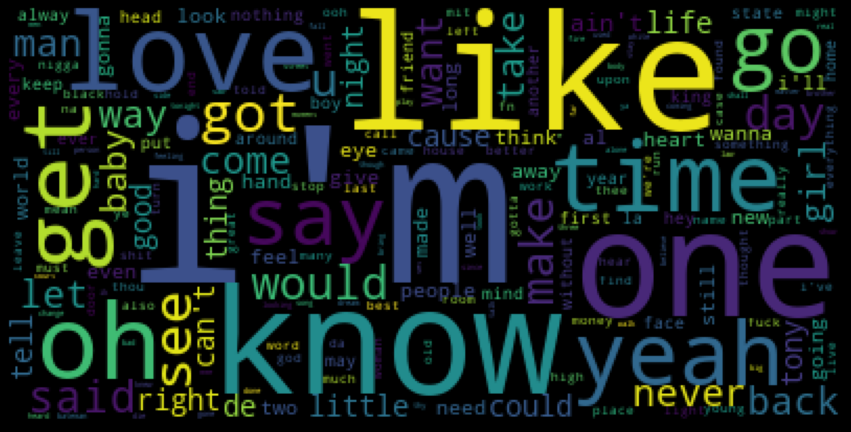

In [98]:
wordcloud = WordCloud(stopwords=stopwords_ls, collocations=False)
wordcloud.generate(','.join(removed_tokens))

plt.figure(figsize = (15,15), facecolor = 'black')
plt.imshow(wordcloud)
plt.axis('off')

## Bigram

In [99]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
lyric = nltk.BigramCollocationFinder.from_words(removed_tokens)
lyric_freq = lyric.score_ngrams(bigram_measures.raw_freq)

In [100]:
pd.DataFrame(lyric_freq, columns=["Lyric","Freq"]).head(20)

,Lyric,Freq
0,"(oh, oh)",0.001056
1,"(yeah, yeah)",0.000870
2,"(la, la)",0.000575
3,"(na, na)",0.000486
4,"(zau, al-makan)",0.000378
5,"(i'm, gonna)",0.000373
6,"(mme, de)",0.000350
7,"(let, go)",0.000340
8,"(love, love)",0.000334
9,"(de, guermantes)",0.000299


## Exploring genre

In [101]:
final_df['Top Genre']
# .value_counts()[:20]

0       arkansas country, contemporary country, countr...
1                           dance pop, pop, post-teen pop
2                                         electropop, pop
3       contemporary country, country, country road, o...
4       dance pop, electropop, etherpop, indie poptimi...
                              ...                        
1989                                      adult standards
1990                                      adult standards
1991                                           blues rock
1992                                                bebop
1993                                      adult standards
Name: Top Genre, Length: 6112, dtype: object

In [102]:
genre_corpus = final_df['Top Genre'].to_list()

In [103]:
## Viewing the most popular genres and recognizing there are similarites
# FreqDist(genre_corpus)

In [104]:
# final_df['Genre'] = final_df['Genre'].to_list()

In [105]:
# final_df.info()

In [106]:
# #Took most popular genres
# ids = {'id':['Country','Metal','Pop','Classical','Rock','Electronic',
#              'Rap','R&;B'],
#       'Genre':['Country','Metal','Pop','Classical','Rock','Electronic',
#                      'Rap','R&;B']}
# ids = dict(zip(ids['id'], ids['Genre']))               
# print(ids)

In [107]:
# final_df.head(1)

In [108]:
# final_df.info()

In [109]:
# final_df['Top Genre'][0]

In [110]:
# final_df['Top Genre'] = [str(i) for i in final_df['Top Genre']]

In [111]:
# final_df['Top Genre'] = final_df['Top Genre'].apply(lambda x: x.upper()) 

# final_df.head()  

In [112]:
# final_df.dtypes

In [113]:
## Viewing the most popular genres and recognizing there are similarites
FreqDist(genre_corpus)

FreqDist({'album rock': 413, 'contemporary country, country, country road': 238, 'contemporary country, country, country road, modern country rock': 224, 'adult standards': 124, 'dance pop, pop, post-teen pop': 119, '': 95, 'glee club, hollywood, post-teen pop': 88, 'dutch pop': 88, 'alternative rock': 86, 'dance pop': 85, ...})

I'm importing re as this method takes a regular expression pattern and a string and searches for that pattern within the string. This helps set me up for when I need to make our genres just one singular generic genre.

In [114]:
import re
## Most frequent / common genres
rep = ['Country','Metal','Pop','Classical','Rock','Electronic',
       'Rap','R&;B','Adult Standards','Indie','Cabaret','Hip Hop','Soul']
final_df['Top Genre_'] = [re.findall(r'|'.join(rep), i,
                                 re.IGNORECASE) for i in final_df['Top Genre']]

In [115]:
final_df['Top Genre_']

0       [country, country, country, country, country, ...
1                                         [pop, pop, pop]
2                                              [pop, pop]
3                    [country, country, country, country]
4                   [pop, pop, pop, indie, pop, pop, pop]
                              ...                        
1989                                    [adult standards]
1990                                    [adult standards]
1991                                               [rock]
1992                                                   []
1993                                    [adult standards]
Name: Top Genre_, Length: 6112, dtype: object

Now I'm going through my Top Genre_ list and making sure that the genres don't repeat in their cell like we saw above. eq() will perform comparisons of my dataframe column objects with constant, series or another dataframes objects.

In [116]:
final_df['Top Genre'][final_df['Top Genre_'].str.len().eq(0)].value_counts()

                                     95
permanent wave                       38
british invasion                     36
neo mellow                           23
No Genre                             20
                                     ..
happy hardcore                        1
hollywood                             1
smooth jazz, smooth saxophone         1
brostep, complextro, edm, electro     1
disco house, vocal house              1
Name: Top Genre, Length: 102, dtype: int64

Now that this is somewhat cleaned up. I need to replace every genre that's not in 'rep' with 'unique genre'. This will make the information more digestible, rather than having a genre look like 'cyberpunk'.

In [117]:
def replace_genre(rep, genre):
    #if genre has nothing in it or whitespace
    if len(genre)==0:
        return "Unique Genre"
    else:
        return max(set(genre), key=genre.count)
final_df['Top Genre_']=final_df['Top Genre_'].apply(lambda x: replace_genre(rep,
                                                                            x)) 

In [118]:
final_df['Top Genre_'].value_counts()

pop                1921
rock               1220
country            1074
rap                 647
Unique Genre        519
metal               217
adult standards     140
hip hop             118
soul                114
indie                88
cabaret              51
electronic            2
classical             1
Name: Top Genre_, dtype: int64

In [119]:
final_df.head()

,Artist,Title,Top Genre,Popularity,Danceability,Energy,Loudness (dB),Speechiness,Acousticness,Liveness,Valence,Length (Duration),Weekly.rank,Peak.position,Weeks.on.chart,Lyrics,Top Genre_
0,Justin Moore,The Ones That Didn't Make It Back Home,"arkansas country, contemporary country, countr...",57.768731,0.611624,0.692393,-5.903244,0.089802,0.173307,0.181164,0.508448,3.96799,93.0,93.0,2.0,The Ones That Didn't Make It Back Home \nTour ...,country
1,Ariana Grande,"Break Up With Your Girlfriend, I'm Bored","dance pop, pop, post-teen pop",85.000000,0.726000,0.554000,-5.290000,0.091700,0.042100,0.106000,0.335000,4,49.0,2.0,20.0,"break up with your girlfriend, i'm bored \nYou...",pop
2,SHAED,Trampoline,"electropop, pop",91.000000,0.619000,0.459000,-5.782000,0.033400,0.560000,0.137000,0.498000,4,77.0,77.0,4.0,Trampoline \nI've been having dreams\nJumping ...,pop
3,Blake Shelton,God's Country,"contemporary country, country, country road, o...",77.000000,0.538000,0.752000,-5.106000,0.039600,0.060800,0.118000,0.217000,4,18.0,18.0,13.0,God's Country \nRight outside of this one chur...,country
4,Halsey,Without Me,"dance pop, electropop, etherpop, indie poptimi...",89.000000,0.752000,0.488000,-7.050000,0.070500,0.297000,0.093600,0.533000,4,17.0,1.0,38.0,Without Me \nFound you when your heart was bro...,pop


In [120]:
# final_df['Top Genre'][final_df['Top Genre_'].str.len().eq(0)].value_counts()

In [121]:
# import re
# rep = ['Country','Metal','Pop','Classical','Rock','Electronic',
#              'Rap','R&;B'] ## add other genres here
# final_df['Top Genre_'] = [re.findall(r'|'.join(rep), i,
#                                  re.IGNORECASE)[0] for i in final_df['Top Genre']]

In [122]:
# print(final_df['Top Genre'])

In [123]:
# final_df.head()

In [124]:
final_df['Top Genre_'].value_counts()

pop                1921
rock               1220
country            1074
rap                 647
Unique Genre        519
metal               217
adult standards     140
hip hop             118
soul                114
indie                88
cabaret              51
electronic            2
classical             1
Name: Top Genre_, dtype: int64

In [125]:
final_df.isna().sum()

Artist                  0
Title                   0
Top Genre               0
Popularity              0
Danceability            0
Energy                  0
Loudness (dB)           0
Speechiness             0
Acousticness            0
Liveness                0
Valence                 0
Length (Duration)       0
Weekly.rank          1994
Peak.position        1994
Weeks.on.chart       1994
Lyrics                  0
Top Genre_              0
dtype: int64

In [126]:
## filling null with 0's

final_df['Weekly.rank'].fillna(value=0, inplace=True)
final_df['Peak.position'].fillna(value=0, inplace=True)
final_df['Weeks.on.chart'].fillna(value=0, inplace=True)

In [127]:
final_df.isna().sum()

Artist               0
Title                0
Top Genre            0
Popularity           0
Danceability         0
Energy               0
Loudness (dB)        0
Speechiness          0
Acousticness         0
Liveness             0
Valence              0
Length (Duration)    0
Weekly.rank          0
Peak.position        0
Weeks.on.chart       0
Lyrics               0
Top Genre_           0
dtype: int64

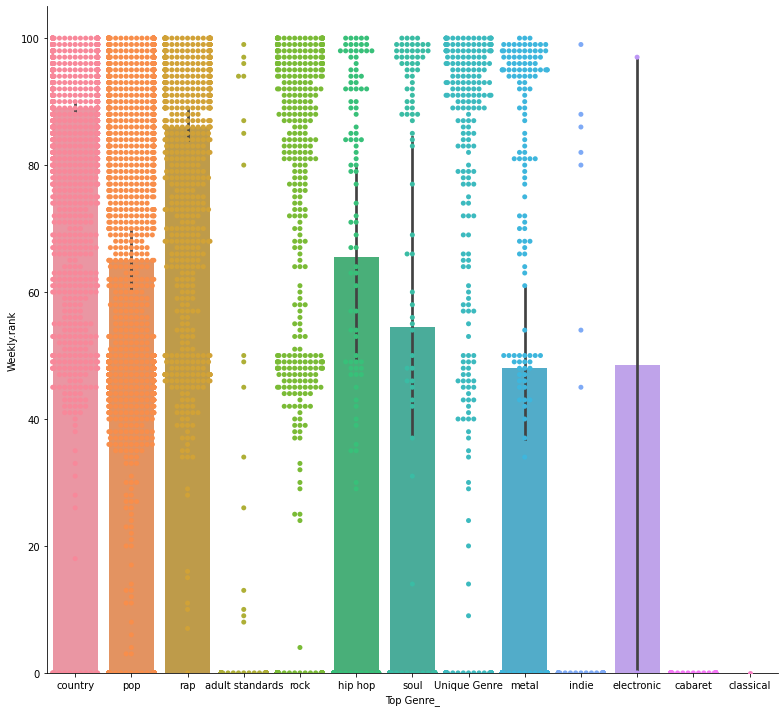

In [128]:
from numpy import median

sns.catplot(x="Top Genre_", y="Weekly.rank", kind="bar",
            estimator=np.median,data=final_df,
            height=10,aspect=11/10)
sns.swarmplot(x="Top Genre_", y="Weekly.rank", data=final_df)
plt.show();

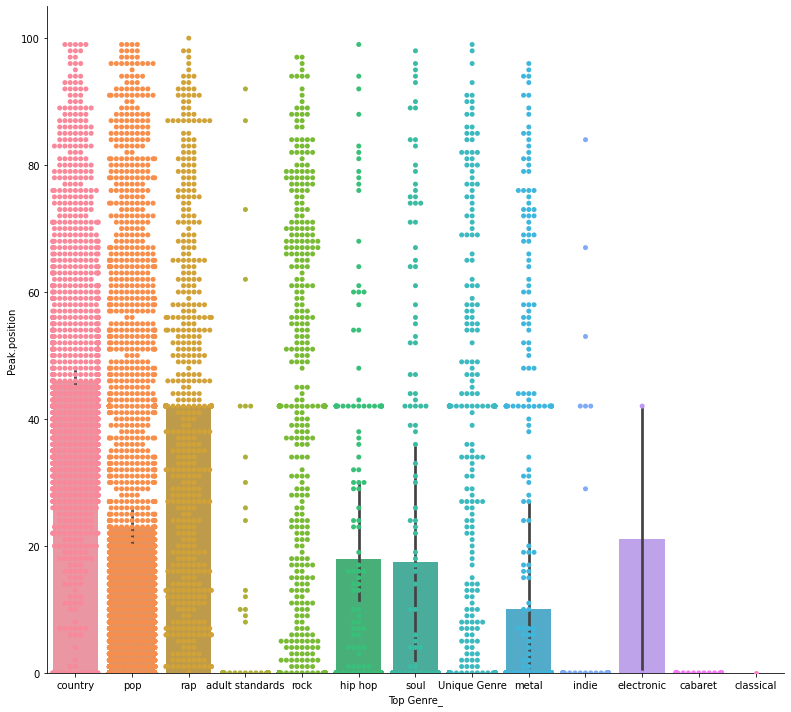

In [129]:
sns.catplot(x="Top Genre_", y="Peak.position", kind="bar",
            estimator=np.median,data=final_df,
            height=10,aspect=11/10)
sns.swarmplot(x="Top Genre_", y="Peak.position", data=final_df)
plt.show();

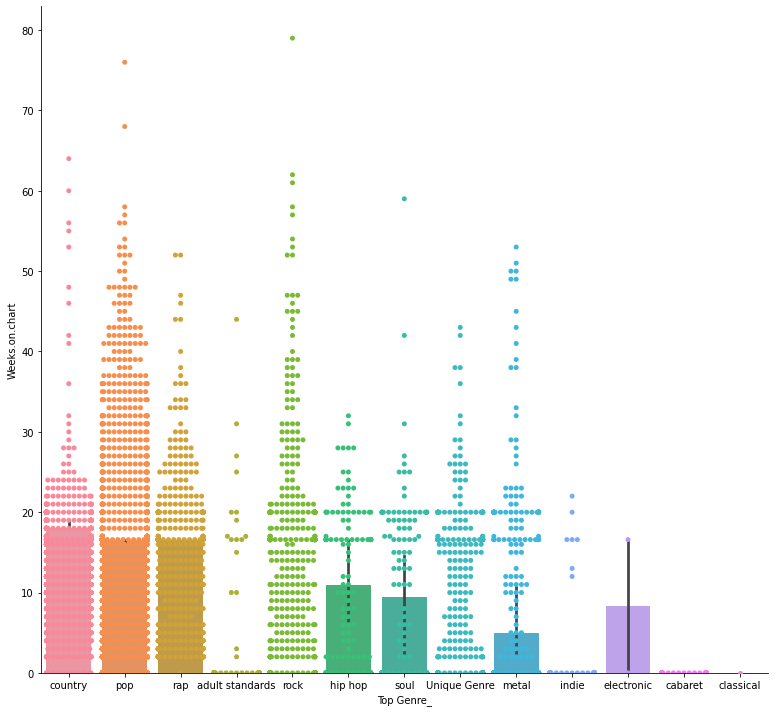

In [130]:
sns.catplot(x="Top Genre_", y="Weeks.on.chart", kind="bar",
            estimator=np.median,data=final_df,
            height=10,aspect=11/10)
sns.swarmplot(x="Top Genre_", y="Weeks.on.chart", data=final_df)
plt.show();

# Train Test Split

In [131]:
final_df.head(1)

,Artist,Title,Top Genre,Popularity,Danceability,Energy,Loudness (dB),Speechiness,Acousticness,Liveness,Valence,Length (Duration),Weekly.rank,Peak.position,Weeks.on.chart,Lyrics,Top Genre_
0,Justin Moore,The Ones That Didn't Make It Back Home,"arkansas country, contemporary country, countr...",57.768731,0.611624,0.692393,-5.903244,0.089802,0.173307,0.181164,0.508448,3.96799,93.0,93.0,2.0,The Ones That Didn't Make It Back Home \nTour ...,country


Create a top 10 column which shows us if this song was in the billboard top 10

In [132]:
final_df['top_100'] = (final_df['Peak.position']>=1)

In [133]:
final_df.head()

,Artist,Title,Top Genre,Popularity,Danceability,Energy,Loudness (dB),Speechiness,Acousticness,Liveness,Valence,Length (Duration),Weekly.rank,Peak.position,Weeks.on.chart,Lyrics,Top Genre_,top_100
0,Justin Moore,The Ones That Didn't Make It Back Home,"arkansas country, contemporary country, countr...",57.768731,0.611624,0.692393,-5.903244,0.089802,0.173307,0.181164,0.508448,3.96799,93.0,93.0,2.0,The Ones That Didn't Make It Back Home \nTour ...,country,True
1,Ariana Grande,"Break Up With Your Girlfriend, I'm Bored","dance pop, pop, post-teen pop",85.000000,0.726000,0.554000,-5.290000,0.091700,0.042100,0.106000,0.335000,4,49.0,2.0,20.0,"break up with your girlfriend, i'm bored \nYou...",pop,True
2,SHAED,Trampoline,"electropop, pop",91.000000,0.619000,0.459000,-5.782000,0.033400,0.560000,0.137000,0.498000,4,77.0,77.0,4.0,Trampoline \nI've been having dreams\nJumping ...,pop,True
3,Blake Shelton,God's Country,"contemporary country, country, country road, o...",77.000000,0.538000,0.752000,-5.106000,0.039600,0.060800,0.118000,0.217000,4,18.0,18.0,13.0,God's Country \nRight outside of this one chur...,country,True
4,Halsey,Without Me,"dance pop, electropop, etherpop, indie poptimi...",89.000000,0.752000,0.488000,-7.050000,0.070500,0.297000,0.093600,0.533000,4,17.0,1.0,38.0,Without Me \nFound you when your heart was bro...,pop,True


In [134]:
## Exploring how many made it
final_df['top_100'].value_counts(1)

True     0.673757
False    0.326243
Name: top_100, dtype: float64

In [135]:
from sklearn.preprocessing import LabelEncoder

In [136]:
le = LabelEncoder()
final_df['top.100'] = le.fit_transform(final_df['top_100'])
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6112 entries, 0 to 1993
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Artist             6112 non-null   object 
 1   Title              6112 non-null   object 
 2   Top Genre          6112 non-null   object 
 3   Popularity         6112 non-null   float64
 4   Danceability       6112 non-null   float64
 5   Energy             6112 non-null   float64
 6   Loudness (dB)      6112 non-null   float64
 7   Speechiness        6112 non-null   float64
 8   Acousticness       6112 non-null   float64
 9   Liveness           6112 non-null   float64
 10  Valence            6112 non-null   float64
 11  Length (Duration)  6112 non-null   object 
 12  Weekly.rank        6112 non-null   float64
 13  Peak.position      6112 non-null   float64
 14  Weeks.on.chart     6112 non-null   float64
 15  Lyrics             6112 non-null   object 
 16  Top Genre_         6112 

In [137]:
y = final_df['top.100']
X = final_df['Lyrics']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=10)

Leveraging tweet tokenizer again so it can capture the full word.

In [139]:
tokenizer = nltk.TweetTokenizer(preserve_case=False)
tokenizer

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer


## Initialize TfIdf Vectorizer, feed in function of tokenize
vectorizer = TfidfVectorizer(tokenizer=tokenizer.tokenize,
                            stop_words=stopwords_ls)

# Vectorize data and make X_train_tfidf and X_test_tfidf
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
X_train_tfidf

<4278x88319 sparse matrix of type '<class 'numpy.float64'>'
	with 896588 stored elements in Compressed Sparse Row format>

In [141]:
# from imblearn.over_sampling import RandomOverSampler 

In [142]:
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train_tfidf, y_train)

# Random Forest

In [143]:
rf = RandomForestClassifier(class_weight="balanced")
rf.fit(X_train_tfidf,y_train)

RandomForestClassifier(class_weight='balanced')

In [144]:
y_hat_test = rf.predict(X_test_tfidf)

In [145]:
y_test_arr = y_test.to_numpy()

In [146]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
#     plt.grid(False)
    plt.show()

In [147]:
## Evaluate and view my model.

from sklearn.metrics import multilabel_confusion_matrix

def evaluate_model(y_train_resampled,y_hat_test,X_test,clf=None,
                  scoring=None,
                   verbose=False,scorer=False,
                   classes=['Not Top 100','Top 100'],
                  normalize = 'true'):
    
    print(metrics.classification_report(y_test,y_hat_test,
                                        target_names=classes))
    if scoring is None:
        scoring = metrics.recall_score(y_test,y_hat_test,average='macro')
    
    cm = metrics.confusion_matrix(y_test, y_hat_test,
    normalize = normalize)
    plot_confusion_matrix(cm,
                      normalize    = False,
                      target_names = classes,
                      title        = "Confusion Matrix")


    if verbose:
        print("MODEL PARAMETERS:")

        print(pd.Series(rf.get_params()))
## Use scoring = recall_macro in gridsearch.        
    if scorer:
        
        return recall_macro(y_test,y_hat_test)

              precision    recall  f1-score   support

 Not Top 100       0.81      0.41      0.55       575
     Top 100       0.78      0.95      0.86      1259

    accuracy                           0.79      1834
   macro avg       0.79      0.68      0.70      1834
weighted avg       0.79      0.79      0.76      1834



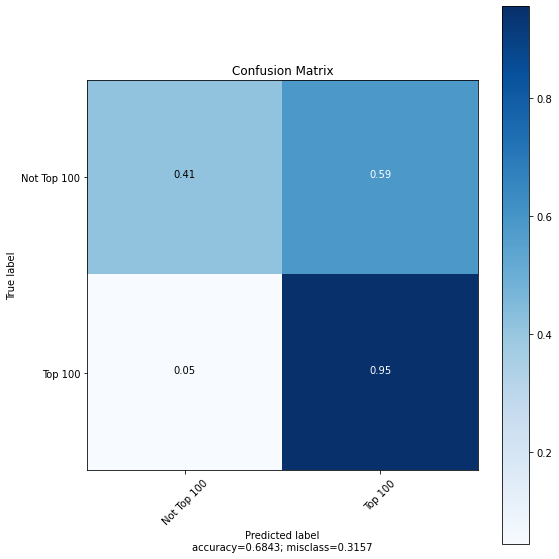

In [148]:
evaluate_model(y_test_arr,y_hat_test,X_test_tfidf,rf)

<AxesSubplot:>

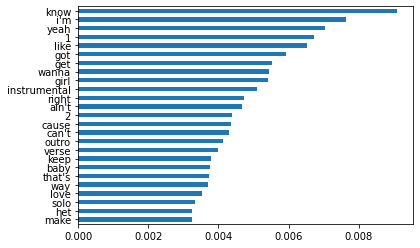

In [149]:
pd.Series(rf.feature_importances_,
          index=vectorizer.get_feature_names()).sort_values().tail(25).plot(kind='barh')

# XGB

In [150]:
xgb_rf = XGBClassifier()
xgb_rf.fit(X_train_tfidf, y_train)

XGBClassifier()

              precision    recall  f1-score   support

 Not Top 100       0.88      0.60      0.72       575
     Top 100       0.84      0.96      0.90      1259

    accuracy                           0.85      1834
   macro avg       0.86      0.78      0.81      1834
weighted avg       0.85      0.85      0.84      1834



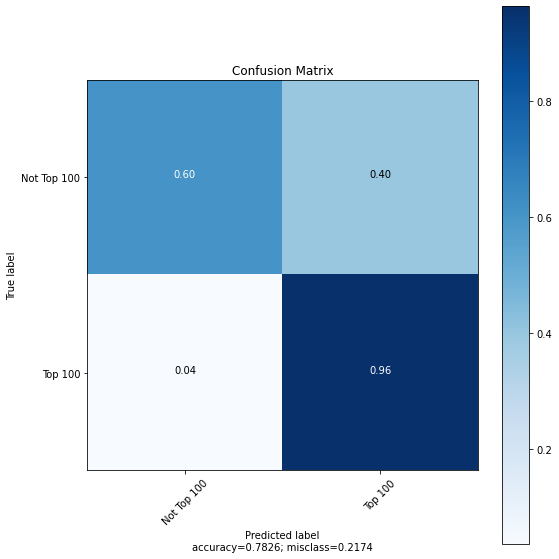

In [151]:
y_pred2 = xgb_rf.predict(X_test_tfidf)

evaluate_model(y_test_arr,y_pred2,X_test,xgb_rf)

<AxesSubplot:>

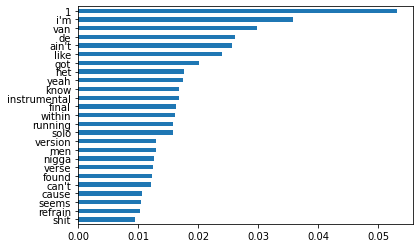

In [152]:
pd.Series(xgb_rf.feature_importances_,
          index=vectorizer.get_feature_names()).sort_values().tail(25).plot(kind='barh')

# SVM

              precision    recall  f1-score   support

 Not Top 100       0.81      0.54      0.65       575
     Top 100       0.82      0.94      0.88      1259

    accuracy                           0.82      1834
   macro avg       0.81      0.74      0.76      1834
weighted avg       0.82      0.82      0.80      1834



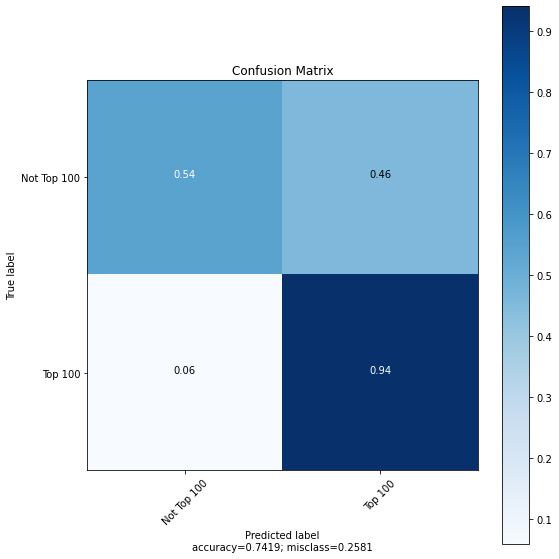

In [153]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X_train_tfidf,y_train)
y_pred = clf.predict(X_test_tfidf)

evaluate_model(y_test_arr,y_pred,X_test_tfidf,clf)

# Conclusion